# Lab Segmentation 2

In [26]:
from commonfunctions import *
from skimage.filters import threshold_mean,threshold_otsu
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def convert_image(img):
    if(len(img.shape)== 3):
        print(len(img.shape))
        img = rgb2gray(img)
        print(img.dtype)
#     else:
#         print(len(img.shape))
#     print(img.dtype)
    if(img.dtype != 'uint8'):
        img = img * 255
        img = img.astype('uint8')
    return img


In [28]:
def getThreshold(image):
#     img = np.copy(image)
# #     img *= 255
#     img = np.array(img.astype("uint8"))
#     print(img)
    img = convert_image(image)
    m = img.shape[0]
    n = img.shape[1]
#     hist = np.zeros(256)
#     for i in range(0,m):
#         for j in range(0,n):
#             hist[img[i][j]] +=1
    hist,bins = np.histogram(img,range(0,257))
    numPixels = np.cumsum(hist)[-1]
#     for i in range(0,len(hist)):
#             numPixels += hist[i]
            
#     print("numPixels=",numPixels)
#     print("histgram length", len(hist))
#     print(" length", len(range(0,257)))
    T_init = 0
    L = list(range(0,len(hist)))
#     for i in range(0,len(hist)):
#         T_init += hist[i]*i
    T_init = np.cumsum(np.multiply(L,hist))[-1]
    T_init = int(T_init//numPixels)
#     print("T_init = ",T_init)

    T2 = T_init
    T_init = 0
    count = 0
    while(T2 != T_init):
        T_init = T2;
        lowerRange = np.array(hist[0:T_init])
        upperRange = np.array(hist[T_init:])
        lowerCumaltive= np.cumsum(hist[0:T_init])
        upperCumaltive = np.cumsum(hist[T_init:])
        
        Lupper = list(range(T_init,len(hist)))
        Tupper = np.sum(np.multiply(Lupper,upperRange))
        Llower = list(range(0,T_init))
        Tlower = np.sum(np.multiply(Llower,lowerRange))

        
        if(upperCumaltive[-1]!=0):
            Tupper = round(Tupper/upperCumaltive[-1])
        else:
            Tupper = 0
        if(lowerCumaltive[-1]!=0):    
            Tlower = round(Tlower/lowerCumaltive[-1])
        else:
            Tlower = 0
        T2 = int((Tupper+Tlower)/2)
#         print("upperCumaltive",upperCumaltive[-1])
#         print("lowerCumaltive",lowerCumaltive[-1])
#         print("Tupper",Tupper)
#         print("Tlower",Tlower)
#         print("T2",T2)
#         print("T_init",T_init)
        count += 1
#     print("saturated after:",count,"iterations")
    return T2
            
#         Tupper =  upperRange[0]*T_init
#         upperCumaltive[0] = upperRange[0]
#         for i in range(1,len(upperRange)):
#             Tupper += upperRange[i]*(i+T_init)
#             upperCumaltive[i] += upperRange[i]+upperCumaltive[i-1]
#         Tlower = lowerRange[0]*0
#         lowerCumaltive[0] = lowerRange[0]
#         for i in range(1,len(lowerRange)):
#             Tlower += lowerRange[i]*i
#             lowerCumaltive[i] += lowerRange[i]+lowerCumaltive[i-1]
    

In [4]:
# img2 = img*255
# img2 = np.array(img2.astype("uint8"))
# T = getThreshold(img)
# print("thrshold ",T)
# T2 = threshold_otsu(read_image(img))
# print("bulit in threshold",T2)

In [38]:
def applyThreshold(image,T):
    img=np.copy(image)    
    img[img < T] = 0
    img[img >= T] = 255
    img = img.astype(np.uint8)
    return img
#     m = img.shape[0]
#     n = img.shape[1]
#     for i in range(0,m):
#         for j in range(0,n):
#             if(img[i][j] < T):
#                 img[i][j]=0
#             if(img[i][j] > T):
#                 img[i][j]=255

In [30]:
img1 = io.imread('book.png')
img2 = io.imread('book1.png')
img3 = io.imread('cameraman.png')
img4 = io.imread('cufe.png')
img1 = convert_image(img1)
img2 = convert_image(img2)
img3 = convert_image(img3)
img4 = convert_image(img4)
T1 = getThreshold(img1)
T21 = threshold_otsu(convert_image(img1))
T2 = getThreshold(img2)
T22 = threshold_otsu(convert_image(img2))
T3 = getThreshold(img3)
T23 = threshold_otsu(convert_image(img3))
T4 = getThreshold(img4)
T24 = threshold_otsu(convert_image(img4))

3
float64
3
float64


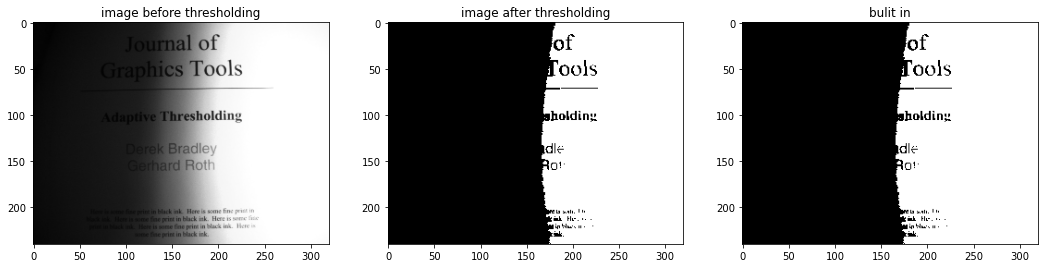

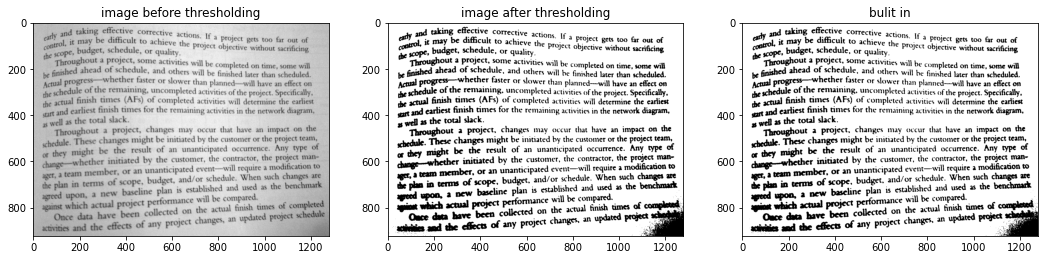

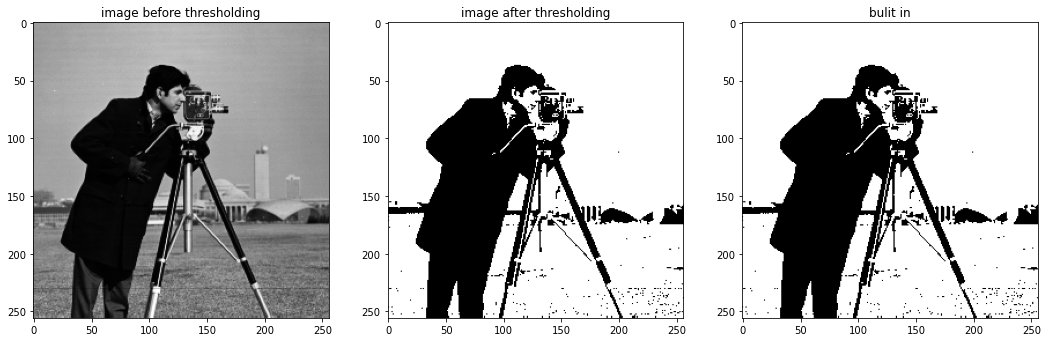

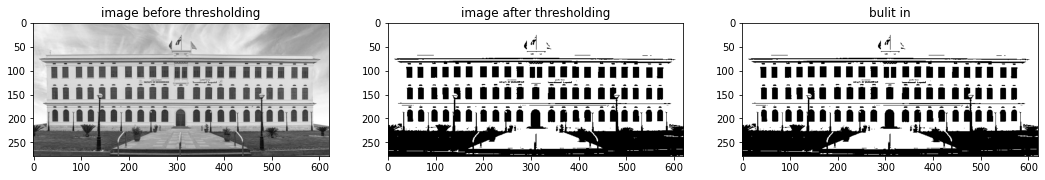

In [31]:
show_images([img1,applyThreshold(img1,T1),applyThreshold(img1,T21)],["image before thresholding","image after thresholding","bulit in"])
show_images([img2,applyThreshold(img2,T2),applyThreshold(img2,T22)],["image before thresholding","image after thresholding","bulit in"])
show_images([img3,applyThreshold(img3,T3),applyThreshold(img3,T23)],["image before thresholding","image after thresholding","bulit in"])
show_images([img4,applyThreshold(img4,T4),applyThreshold(img4,T24)],["image before thresholding","image after thresholding","bulit in"])





In [42]:
def adaptive_threshold(img):
    image = np.copy(img)
    m = image.shape[0]
    n = image.shape[1]
    img1 = image[0:int(m/2),0:int(n/2)]
    img2 = image[0:int(m/2),int(n/2):]
    img3 = image[int(m/2):,0:int(n/2)]
    img4 = image[int(m/2):,int(n/2):]
#     T1 = threshold_otsu(img1)
#     T2 = threshold_otsu(img2)
#     T3 = threshold_otsu(img3)
#     T4 = threshold_otsu(img4)
    T1 = getThreshold(img1)
    T2 = getThreshold(img2)
    T3 = getThreshold(img3)
    T4 = getThreshold(img4)
    img1 = applyThreshold(img1,T1)
    img2 = applyThreshold(img2,T2)
    img3 = applyThreshold(img3,T3)
    img4 = applyThreshold(img4,T4)
    image[0:int(m/2),0:int(n/2)] = img1
    image[0:int(m/2),int(n/2):] = img2
    image[int(m/2):,0:int(n/2)] = img3
    image[int(m/2):,int(n/2):] = img4
    return image


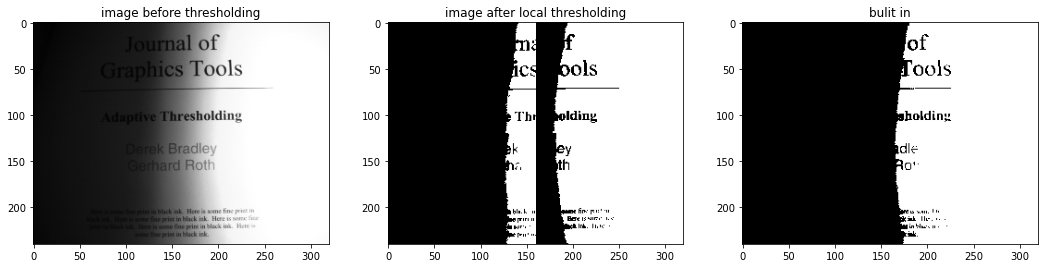

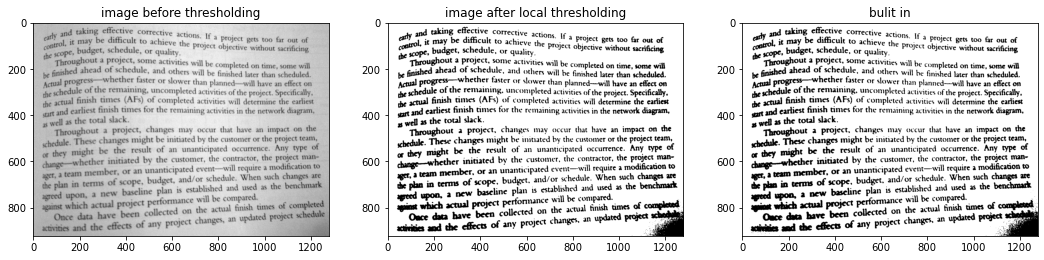

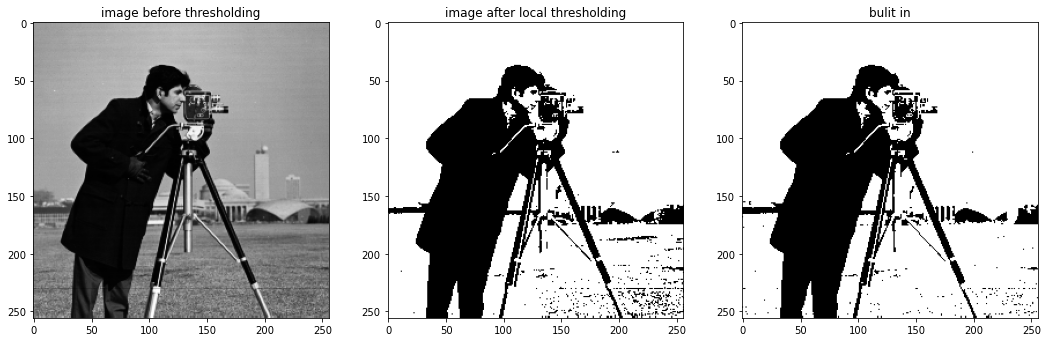

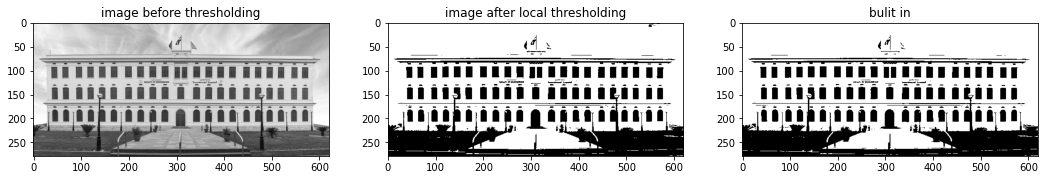

In [43]:
img1_local = adaptive_threshold(img1)
img2_local = adaptive_threshold(img2)
img3_local = adaptive_threshold(img3)
img4_local = adaptive_threshold(img4)


show_images([img1,img1_local,applyThreshold(img1,T1)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img2,img2_local,applyThreshold(img2,T2)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img3,img3_local,applyThreshold(img3,T3)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img4,img4_local,applyThreshold(img4,T4)],["image before thresholding","image after local thresholding","bulit in"])


### Bonus

In [44]:
def adaptive_threshold2(img):
    image = np.copy(img)
    m = image.shape[0]
    n = image.shape[1]
    if(m<120 or n < 120):
        img1 = image[0:int(m/2),0:int(n/2)]
        img2 = image[0:int(m/2),int(n/2):]
        img3 = image[int(m/2):,0:int(n/2)]
        img4 = image[int(m/2):,int(n/2):]
        img1 = adaptive_threshold(img1)
        img2 = adaptive_threshold(img2)
        img3 = adaptive_threshold(img3)
        img4 = adaptive_threshold(img4)

        image[0:int(m/2),0:int(n/2)] = img1
        image[0:int(m/2),int(n/2):] = img2
        image[int(m/2):,0:int(n/2)] = img3
        image[int(m/2):,int(n/2):] = img4
    else:
        img1 = image[0:int(m/2),0:int(n/2)]
        img2 = image[0:int(m/2),int(n/2):]
        img3 = image[int(m/2):,0:int(n/2)]
        img4 = image[int(m/2):,int(n/2):]
        img1 = adaptive_threshold2(img1)
        img2 = adaptive_threshold2(img2)
        img3 = adaptive_threshold2(img3)
        img4 = adaptive_threshold2(img4)

        image[0:int(m/2),0:int(n/2)] = img1
        image[0:int(m/2),int(n/2):] = img2
        image[int(m/2):,0:int(n/2)] = img3
        image[int(m/2):,int(n/2):] = img4
    return image

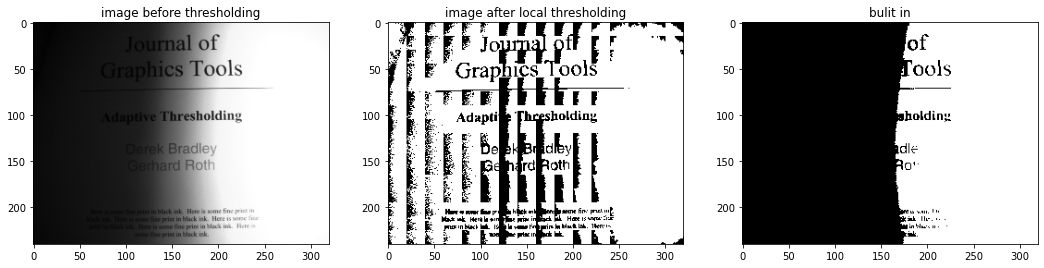

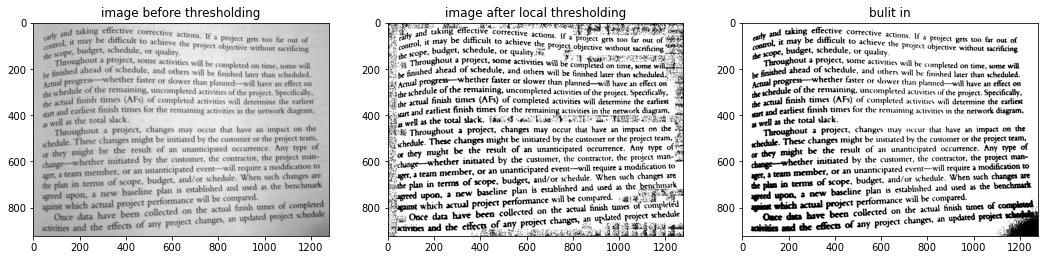

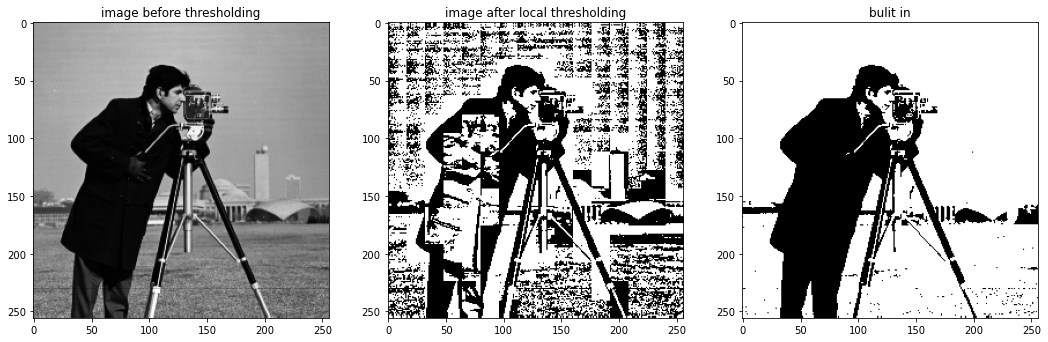

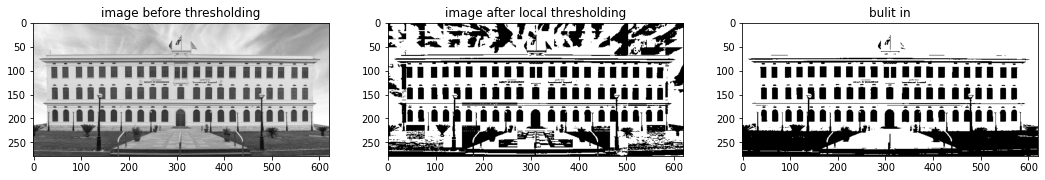

In [45]:
img1_local2 = adaptive_threshold2(img1)
img2_local2 = adaptive_threshold2(img2)
img3_local2 = adaptive_threshold2(img3)
img4_local2 = adaptive_threshold2(img4)

show_images([img1,img1_local2,applyThreshold(img1,T1)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img2,img2_local2,applyThreshold(img2,T2)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img3,img3_local2,applyThreshold(img3,T3)],["image before thresholding","image after local thresholding","bulit in"])
show_images([img4,img4_local2,applyThreshold(img4,T4)],["image before thresholding","image after local thresholding","bulit in"])
